In [1]:
from tensorflow import keras

In [2]:
from sklearn.datasets import load_iris

In [4]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
# 신경망 심층신경망(2개이상의 dense층)

In [7]:
iris.data.shape

(150, 4)

In [47]:
model = keras.Sequential()
model.add( keras.layers.Dense(64,activation = 'relu',input_shape=(4,)) )
model.add( keras.layers.Dense(32,activation = 'relu' ) )
# model.add( keras.layers.Dropout(0.2) )
model.add( keras.layers.Dense(3,activation = 'softmax') )
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 64)                320       
                                                                 
 dense_17 (Dense)            (None, 32)                2080      
                                                                 
 dense_18 (Dense)            (None, 3)                 99        
                                                                 
Total params: 2,499
Trainable params: 2,499
Non-trainable params: 0
_________________________________________________________________


In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =  train_test_split(iris.data,iris.target, random_state=42)

In [49]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(x_train)
x_train_scaled = ss.transform(x_train)
x_text_scaled = ss.transform(x_test)

In [50]:
cb = keras.callbacks.ModelCheckpoint('iris_dnn.h5')
earlyst_cb = keras.callbacks.EarlyStopping(patience=1,restore_best_weights=True)
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(x_train_scaled, y_train,epochs=30,validation_data=(x_text_scaled,y_test),callbacks=[cb, earlyst_cb])

Epoch 1/30
4/4 [==============================] - 1s 53ms/step - loss: 1.0648 - accuracy: 0.3661 - val_loss: 1.0122 - val_accuracy: 0.3421
Epoch 2/30
4/4 [==============================] - 0s 13ms/step - loss: 0.9724 - accuracy: 0.5089 - val_loss: 0.9166 - val_accuracy: 0.5526
Epoch 3/30
4/4 [==============================] - 0s 13ms/step - loss: 0.8938 - accuracy: 0.6696 - val_loss: 0.8341 - val_accuracy: 0.8421
Epoch 4/30
4/4 [==============================] - 0s 13ms/step - loss: 0.8260 - accuracy: 0.8125 - val_loss: 0.7628 - val_accuracy: 0.8421
Epoch 5/30
4/4 [==============================] - 0s 12ms/step - loss: 0.7649 - accuracy: 0.8214 - val_loss: 0.6997 - val_accuracy: 0.8421
Epoch 6/30
4/4 [==============================] - 0s 13ms/step - loss: 0.7099 - accuracy: 0.8125 - val_loss: 0.6432 - val_accuracy: 0.8421
Epoch 7/30
4/4 [==============================] - 0s 12ms/step - loss: 0.6627 - accuracy: 0.8125 - val_loss: 0.5905 - val_accuracy: 0.8421
Epoch 8/30
4/4 [===========

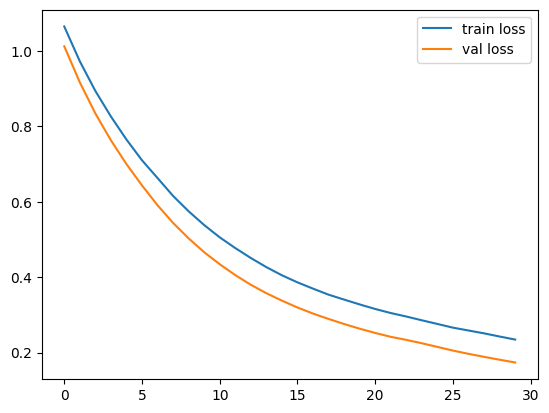

In [51]:
# loss 시각화
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label = 'val loss')
plt.legend()
plt.show()


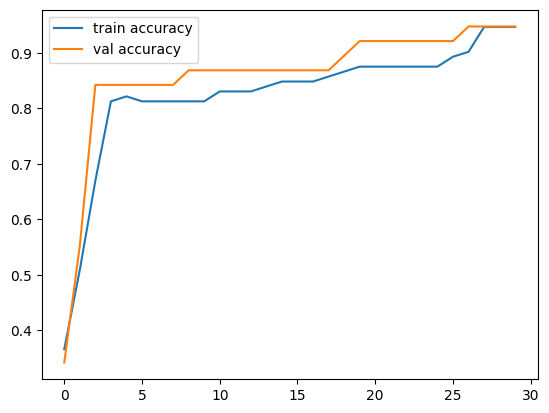

In [52]:
plt.plot(history.history['accuracy'], label = 'train accuracy')
plt.plot(history.history['val_accuracy'], label = 'val accuracy')
plt.legend()
plt.show()

In [53]:
model.evaluate(x_train_scaled,y_train)

4/4 [==============================] - 0s 2ms/step - loss: 0.2287 - accuracy: 0.9464


[0.22869808971881866, 0.9464285969734192]

In [88]:
import numpy as np
(x_train,y_train),(x_test,y_test) = keras.datasets.cifar10.load_data()

In [91]:
np.unique(y_train,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))

(32, 32, 3)

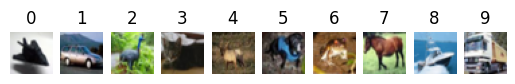

In [102]:
# 각 클래스별 이미지 출력
for i in range(10):
  index = np.where(y_train == i)[0][0]
  plt.subplot(1,10,i+1)
  plt.imshow(x_train[index])
  plt.title(i)
  plt.axis('off')
plt.show()